In [16]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
Xtrain, ytrain = np.load('fromSuci/Xtrain.npy'), np.load('fromSuci/ytrain.npy')
Xtest, ytest = np.load('fromSuci/Xtest.npy'), np.load('fromSuci/ytest.npy')
Xvalid, yvalid = np.load('fromSuci/Xtrain.npy'), np.load('fromSuci/ytrain.npy')

In [3]:
set(ytrain.flatten())

{0, 1}

In [4]:
nFactors = Xtrain.shape[1]

In [1]:
layers     = [64, 32, 8, 1]
dropout    = [0.3, 0.2 , 0.1, 0]
activation = [tf.tanh, tf.tanh, tf.tanh, None]

NameError: name 'tf' is not defined

In [6]:
X = tf.placeholder(dtype=tf.float32, shape=(None, nFactors), name='X')
y = tf.placeholder(dtype=tf.float32, shape=(None, 1), name='y')

NN = X * 1

for l, d, a in zip(layers, dropout, activation):
    NN = tf.layers.dense(NN, l, activation=a)
    NN = tf.layers.dropout(NN, d)
    
err = tf.nn.sigmoid_cross_entropy_with_logits(labels=y, logits=NN)
err = tf.reduce_mean(err)

lr = tf.placeholder(dtype=tf.float32, shape=())
opt = tf.train.AdamOptimizer(learning_rate=lr).minimize( err )

init = tf.global_variables_initializer()

In [22]:
trainErr = []
testErr  = []

with tf.Session() as sess:
    sess.run(init)
    for i in tqdm(range(500)):
        _, errTrain =  sess.run([opt, err], feed_dict={
                X : Xtrain,
                y : ytrain, 
                lr: 0.01
            })
        errTest =  sess.run(err, feed_dict={
                X : Xtest,
                y : ytest, 
                lr: 0.01
            })
        
        trainErr.append( errTrain )
        testErr.append( errTest )


100%|██████████| 500/500 [00:38<00:00, 13.04it/s]


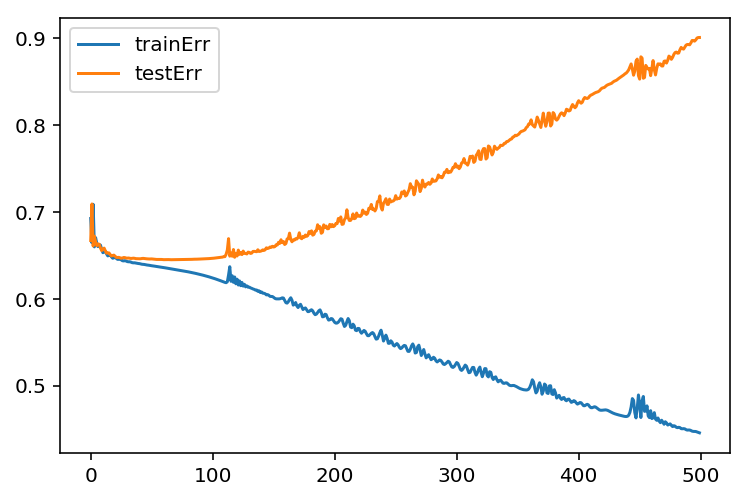

In [23]:
plt.plot(trainErr, label='trainErr')
plt.plot(testErr, label='testErr')
plt.legend()
plt.show()
plt.close('all')

In [25]:
def getTestTrain(learning, nSteps):
    trainErr = []
    testErr  = []

    with tf.Session() as sess:
        sess.run(init)
        for i in tqdm(range(nSteps)):
            _, errTrain =  sess.run([opt, err], feed_dict={
                    X : Xtrain,
                    y : ytrain, 
                    lr: 0.01
                })
            errTest =  sess.run(err, feed_dict={
                    X : Xtest,
                    y : ytest, 
                    lr: learning
                })

            trainErr.append( errTrain )
            testErr.append( errTest )
            
    return trainErr, testErr


def plotData(trainErr, testErr):
    plt.plot(trainErr, label='trainErr')
    plt.plot(testErr, label='testErr')
    plt.legend()
    plt.show()
    plt.close('all')

100%|██████████| 300/300 [00:22<00:00, 13.12it/s]


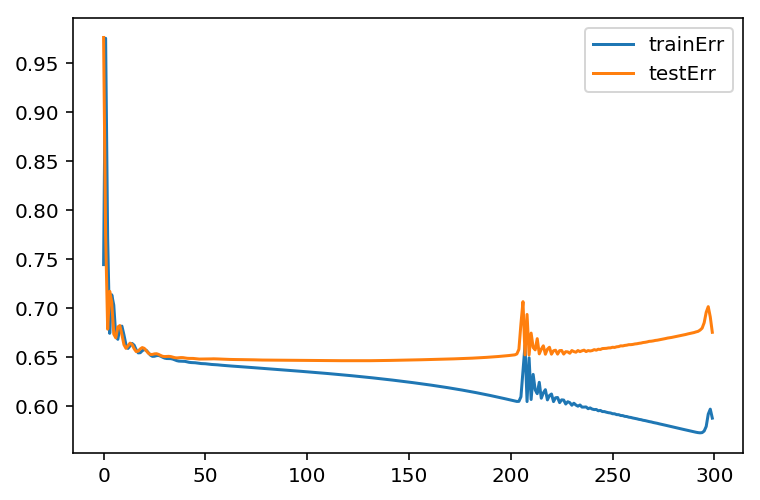

In [27]:
plotData(*getTestTrain(0.01, 300))

100%|██████████| 300/300 [00:23<00:00, 12.84it/s]


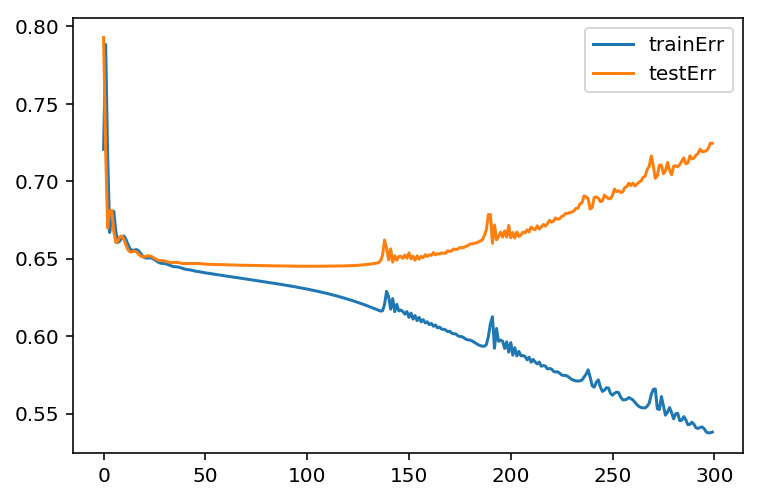

In [28]:
plotData(*getTestTrain(0.01, 300))

100%|██████████| 300/300 [00:22<00:00, 13.09it/s]


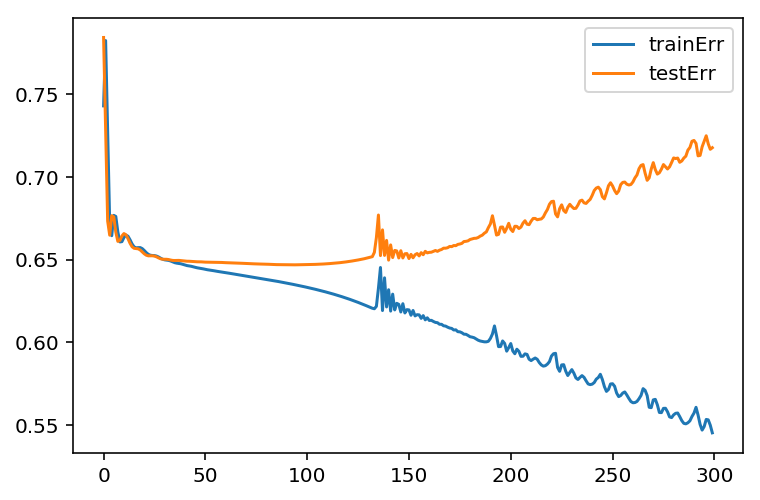

In [32]:
plotData(*getTestTrain(0.0001, 300))

100%|██████████| 300/300 [00:23<00:00, 12.98it/s]


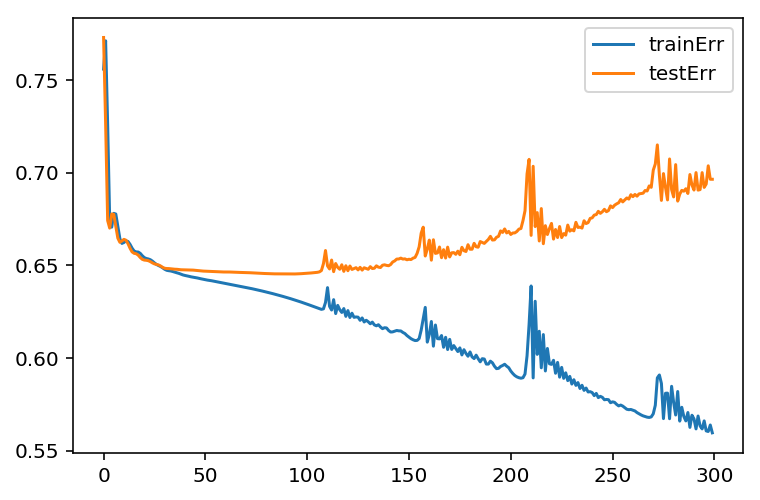

In [29]:
plotData(*getTestTrain(0.1, 300))

100%|██████████| 300/300 [00:23<00:00, 12.78it/s]


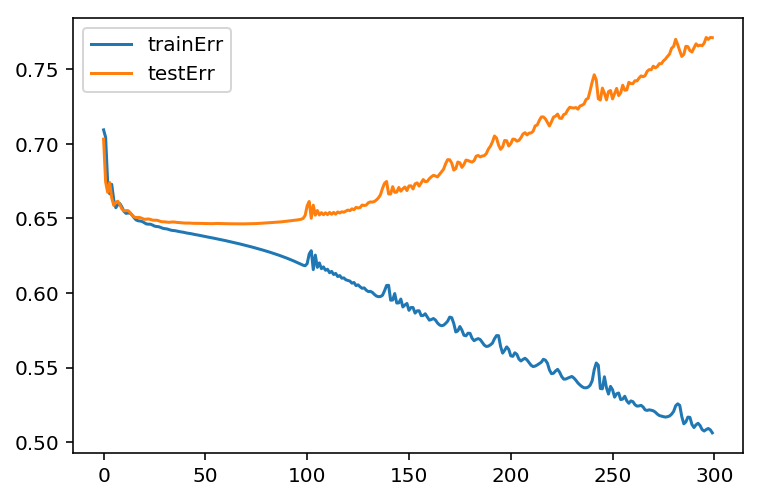

In [30]:
plotData(*getTestTrain(1, 300))

In [33]:
trainErr = []
testErr  = []

with tf.Session() as sess:
    sess.run(init)
    for i in tqdm(range(300)):
        _, errTrain =  sess.run([opt, err], feed_dict={
                X : Xtrain,
                y : ytrain, 
                lr: 0.01
            })
        errTest =  sess.run(err, feed_dict={
                X : Xtest,
                y : ytest
            })
        
        trainErr.append( errTrain )
        testErr.append( errTest )

100%|██████████| 300/300 [00:22<00:00, 13.07it/s]


In [37]:
with tf.Session() as sess:
    sess.run(init)
    errVal = sess.run(err, feed_dict={
        y : ytest,
        NN : 1e4*(ytest - 0.5)
    })
    
print(errVal)

0.0


100%|██████████| 300/300 [00:22<00:00, 13.35it/s]


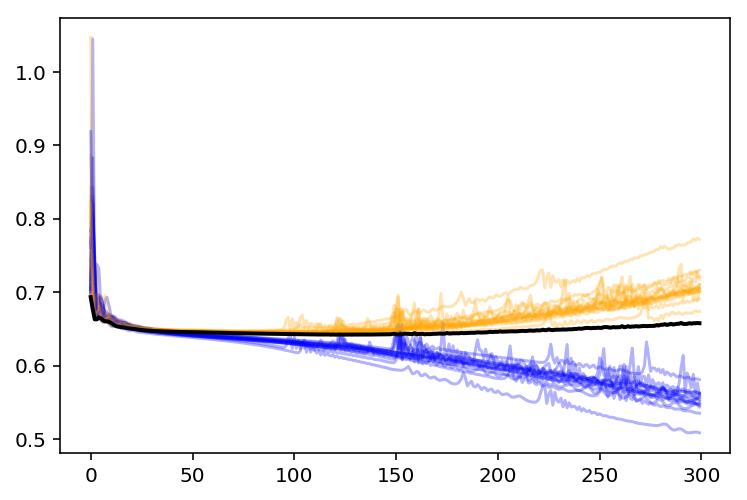

In [51]:
allNN = []

for i in range(15): # Change to 15 later
    trainErr = []
    testErr  = []
    testNN   = []

    with tf.Session() as sess:
        sess.run(init)
        for i in tqdm(range(300)):
            _, errTrain =  sess.run([opt, err], feed_dict={
                    X : Xtrain,
                    y : ytrain, 
                    lr: 0.01
                })
            errTest, nnTest =  sess.run([err, NN], feed_dict={
                    X : Xtest,
                    y : ytest,
                })

            trainErr.append( errTrain )
            testNN.append( nnTest )
            testErr.append( errTest )
    
    allNN.append( testNN )
    plt.plot(trainErr, color='blue', alpha=0.3)
    plt.plot(testErr, color='orange', alpha=0.3)
    
allNN1 = np.array(allNN).mean(axis=0)
    
mergedErr = []
with tf.Session() as sess:
    sess.run(init)
    for i in range(allNN1.shape[0]):
        errVal1 = sess.run(err, feed_dict={
            y : ytest, NN : allNN1[i]})
        
        mergedErr.append( errVal1 )
    
plt.plot(mergedErr, color='k', lw=2)
plt.show()
plt.close('all')


In [42]:
np.array(allNN).shape

(3, 300, 13425, 1)

In [43]:
ytest.shape

(13425, 1)

In [44]:
np.array(allNN).mean(axis=0).shape

(300, 13425, 1)

In [45]:
allNN1 = np.array(allNN).mean(axis=0)

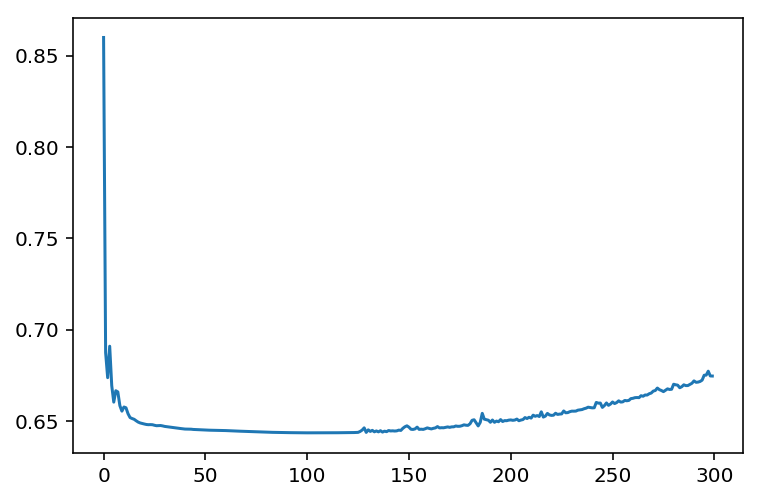

In [49]:
mergedErr = []
with tf.Session() as sess:
    sess.run(init)
    for i in range(allNN1.shape[0]):
        errVal1 = sess.run(err, feed_dict={
            y : ytest, NN : allNN1[i]})
        
        mergedErr.append( errVal1 )
    
plt.plot(mergedErr)
plt.show()
plt.close('all')